In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = data.drop('math_score', axis=1)
y = data['math_score']

In [5]:
num_features = [feature for feature in X.columns if data[feature].dtype != 'O']
categorical_features = X.select_dtypes(include='O').columns

scaler = StandardScaler()
encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', encoder, categorical_features),
        ('StandardScaler', scaler, num_features),   
    ]
)

In [6]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    
    return mae, rmse, r2_square

In [16]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbours Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRFRegressor(),
    'CatBoost Regressor': CatBoostRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performanc for Training set")
    print(f"-  Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"-   Mean Absolute Error: {model_train_mae:.4f} ")
    print(f"-   R2 Score: {model_train_r2:.4f} ")
    
    print("------------------------------------------")
    
    print("Model Performance for Test set")
    print(f"-  Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"-   Mean Absolute Error: {model_test_mae:.4f} ")
    print(f"-   R2 Score: {model_test_r2:.4f} ")
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model Performanc for Training set
-  Root Mean Squared Error: 5.3293
-   Mean Absolute Error: 4.2716 
-   R2 Score: 0.8740 
------------------------------------------
Model Performance for Test set
-  Root Mean Squared Error: 5.4252
-   Mean Absolute Error: 4.2222 
-   R2 Score: 0.8790 


Lasso
Model Performanc for Training set
-  Root Mean Squared Error: 6.5938
-   Mean Absolute Error: 5.2063 
-   R2 Score: 0.8071 
------------------------------------------
Model Performance for Test set
-  Root Mean Squared Error: 6.5197
-   Mean Absolute Error: 5.1579 
-   R2 Score: 0.8253 


Ridge
Model Performanc for Training set
-  Root Mean Squared Error: 5.3233
-   Mean Absolute Error: 4.2650 
-   R2 Score: 0.8743 
------------------------------------------
Model Performance for Test set
-  Root Mean Squared Error: 5.3904
-   Mean Absolute Error: 4.2111 
-   R2 Score: 0.8806 


K-Neighbours Regressor
Model Performanc for Training set
-  Root Mean Squared Error: 5.7079
-   Mean

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.879046
5,XGBRegressor,0.862432
6,CatBoost Regressor,0.851632
7,AdaBoost Regressor,0.849330
4,Random Forest Regressor,0.849189
1,Lasso,0.825320
3,K-Neighbours Regressor,0.783813


In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"Accuracy of the model is {score:.4f}")

Accuracy of the model is 0.8790


Text(0, 0.5, 'Predicted')

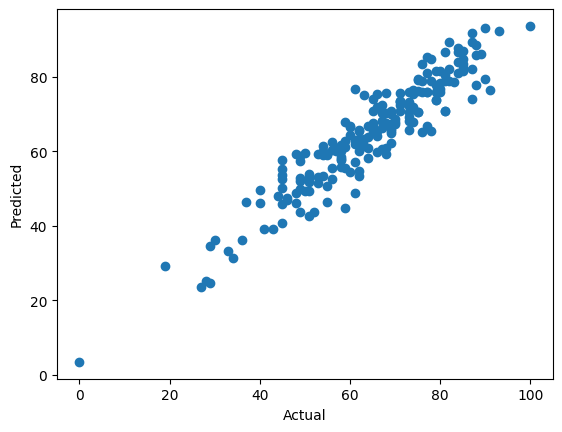

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

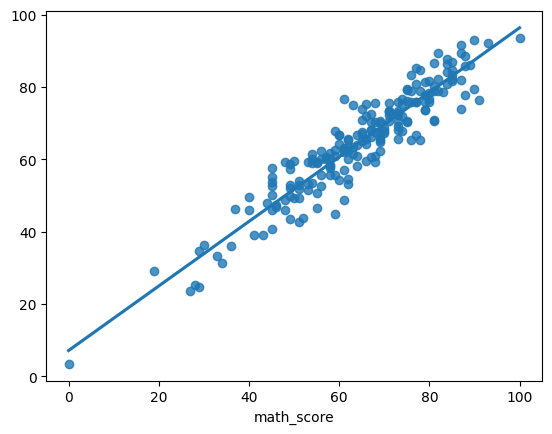

In [24]:
sns.regplot(x=y_test, y=y_pred, ci=None)

In [25]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
